In [1]:
import pandas as pd
import sqlalchemy
from urllib import parse

In [2]:
user = 'encore'
password = '123'
host='192.168.0.95'
port = 3306
database = 'encore'
password = parse.quote_plus(password)
engine = sqlalchemy.create_engine(f"mysql://{user}:{password}@{host}:{port}/{database}")

In [3]:
try:
    with engine.connect() as connection:
        print("Database connection sucessful!")
except Exception as e:
    print(f"Database connection failed: {e}")

Database connection sucessful!


In [4]:
#큰 용량의 파일
kbo =pd.read_sql_query("select * from kbo", con=engine)

In [5]:
kbo

,index,선수명,등번호,생년월일,포지션,경력,입단 계약금,연봉,지명순위,입단년도,team,신장,체중,BMI
0,0.0,강동훈,No.034,2000년 11월 23일,투수(우투우타),천안남산초-청주중-청주고-중앙대,7000만원,3000만원,24 KIA 5라운드 46순위,,KIA 타이거즈,185,98,28.634039
1,1.0,강민제,No.038,2005년 02월 10일,내야수(우투우타),군산중앙초-군산중-군산상일고,4000만원,3000만원,24 KIA 9라운드 86순위,,KIA 타이거즈,181,82,25.029761
2,2.0,강이준,No.36,1998년 04월 07일,투수(우투우타),발산초-덕수중-구리인창고-KIA-상무,7000만원,3000만원,17 KIA 2차 4라운드 34순위,19KIA,KIA 타이거즈,190,86,23.822715
3,3.0,고명성,No.,1999년 04월 16일,내야수(우투우타),군산남초-군산남중-군산상고-KT,7000만원,3100만원,18 KT 2차 4라운드 31순위,18KT,KIA 타이거즈,178,68,21.461937
4,4.0,고종욱,No.57,1989년 01월 11일,외야수(우투좌타),역삼초-대치중-경기고-한양대-히어로즈-상무-히어로즈-SK-SSG,8000만원,15000만원,11 넥센 3라운드 19순위,11넥센,KIA 타이거즈,184,83,24.515595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,NaN,주승우,No.30,2000년 01월 30일,투수(우투우타),송추초(의정부리틀)-영동중-서울고-성균관대,18000만원,3200만원,22 키움 1차,22키움,키움 히어로즈,180,82,25.308642
1822,NaN,최주환,No.53,1988년 02월 28일,내야수(우투좌타),학강초-광주동성중-광주동성고-두산-상무-두산-SK-SSG,6000만원,65000만원,06 두산 2차 6라운드 46순위,06두산,키움 히어로즈,177,73,23.301095
1823,NaN,하영민,No.50,1995년 05월 07일,투수(우투우타),광주수창초-진흥중-진흥고-히어로즈,15000만원,8000만원,14 넥센 2차 1라운드 4순위,14넥센,키움 히어로즈,183,74,22.096808
1824,NaN,헤이수스,No.54,1996년 12월 10일,투수(좌투좌타),베네수엘라 Juanita Hernandez(고),,600000달러,24 키움 자유선발,24키움,키움 히어로즈,192,104,28.211806


In [10]:
#평균
kbo_mean = kbo.신장.mean()

In [9]:
#표준편차
kbo_std = kbo.신장.std(ddof=0)

In [12]:
kbo['표준신장'] = kbo.신장.apply(lambda x : (x-kbo_mean) / kbo_std)

In [13]:
#0과 같은 것을 확인
kbo['표준신장'].mean()

np.float64(-2.5176404711762586e-15)

In [14]:
#1과 같은 것을 확인 
kbo['표준신장'].std()

np.float64(1.000273935082525)

<Axes: ylabel='Frequency'>

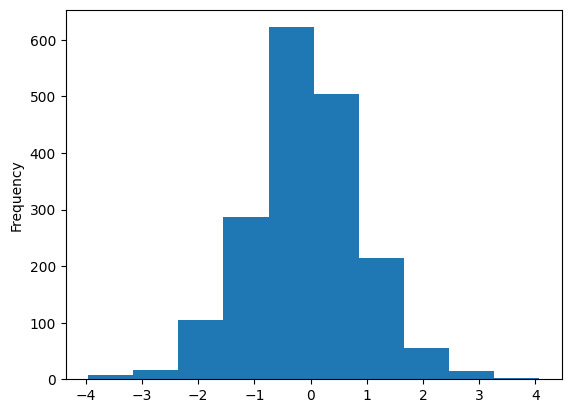

In [15]:
#정규분포 형태
kbo['표준신장'].plot(kind='hist')
#평범한 사람은 +-2정도까지 = 95% 
# +-1정도까지는 68%

In [16]:
#kbo['표준신장'] = kbo.신장.apply(lambda x : (x-kbo_mean) / kbo_std)
#데이터를 데이터-평균값 / 표준편차로 가공하면 가공된 데이터로 구한 평균값은 0이고, 표준편차는 1이 된다. = 이 값을 Z-score 표준점수(=표준화)라고 부른다 
kbo['표준체중'] = kbo.체중.apply(lambda x : (x-kbo.체중.mean()) / kbo.체중.std(ddof=0))

In [17]:
kbo['표준체중'].mean()

np.float64(5.652044489000797e-16)

In [18]:
kbo['표준체중'].std()

np.float64(1.000273935082525)

<Axes: ylabel='Frequency'>

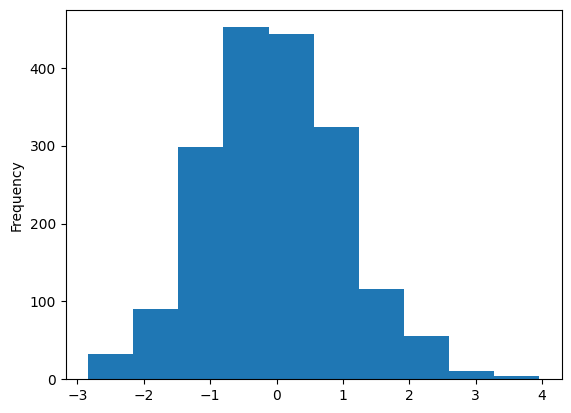

In [19]:
kbo['표준체중'].plot(kind='hist')

In [20]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [21]:
import seaborn as sns

In [168]:
sns.load_dataset('titanic')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [26]:
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [29]:
df.deck

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [30]:
df.deck.value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [31]:
df.deck.value_counts(normalize=True)

deck
C    0.290640
B    0.231527
D    0.162562
E    0.157635
A    0.073892
F    0.064039
G    0.019704
Name: proportion, dtype: float64

In [32]:
df.deck.value_counts(dropna = False, normalize=True)

deck
NaN    0.772166
C      0.066218
B      0.052750
D      0.037037
E      0.035915
A      0.016835
F      0.014590
G      0.004489
Name: proportion, dtype: float64

In [33]:
df.dropna(axis=1).isnull().sum()

survived      0
pclass        0
sex           0
sibsp         0
parch         0
fare          0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

In [34]:
#결측치가 1개 이상 포함된 속성을 삭제
df.dropna(axis=1).shape

(891, 11)

In [35]:
df.shape

(891, 15)

In [39]:
df.notnull().sum()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [37]:
df.dropna(axis=1, thresh=600).isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [40]:
#두개의 컬럼이 모두 없는 행을 지워줘 
df.dropna(axis=0, subset=['age', 'deck'], how='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [41]:
#결측치 채울 때 fillna함수 사용
df.deck.fillna('C')

0      C
1      C
2      C
3      C
4      C
      ..
886    C
887    B
888    C
889    C
890    C
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [43]:
titanic = pd.read_csv("https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/1-1_titanic.csv")

In [46]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
titanic.drop(['PassengerId', 'Cabin'], axis=1, inplace=True)

In [48]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## 질적변수(범주형 데이터, Category)
* 분류를 위한 수치로 수치 사이의 간격에 큰 의미가 없는 경우
* 티켓 등급이 바로 질적변수
* 질적변수는 다시 명목 척도와 순서 척도로 분류되는데, 먼저 명목 척도는 '단지 분류를 위한 것'으로 방 번호나 티켓 번호 같은 것이 해당
* 순서척도는 질적 변수 중에서도 특히 '순서에 의미가 있는 것'을 의미
* 예를 들어 Pclass는 질적 변수 중에서도 순서 척도로 분류


## 양적변수
* 나이, 티켓 요금과 같이 간격에 의미가 있는 수치
* 양적 변수는 다시 간격 척도와 비례 척도로 분류할 수 있음
* 간격 척도란 같은 간격의 눈금으로 측적하는 것
* 비례 척도란 간격 척도의 조건을 만족시키는 것 중 원점이 있어서 데이터 비율에 의미를 갖게 되는 것
* Fare는 비례 척도임 ( 3달러짜리 티켓은 1달러짜리 티켓보다 세 배 비싸다'라고 할 수 있기 때문임...)


In [49]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [50]:
질적 = ['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Embarked']
양적 = ['Age', 'SibSp', 'Parch', 'Fare']

In [51]:
titanic['Survived'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [53]:
#0,1로 표현 = category / 형태변환 = astype 
for type_ in 질적:
    titanic[type_] = titanic[type_].astype('category')

#titanic['질적'] = titanic['질적'].astype('category') / 위와 결과 동일 

In [54]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    category
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    category
 8   Fare      891 non-null    float64 
 9   Embarked  889 non-null    category
dtypes: category(6), float64(2), int64(2)
memory usage: 96.2 KB


In [56]:
titanic[질적]

,Survived,Pclass,Name,Sex,Ticket,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,1,3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,0,3,"Allen, Mr. William Henry",male,373450,S
...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,211536,S
887,1,1,"Graham, Miss. Margaret Edith",female,112053,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,S
889,1,1,"Behr, Mr. Karl Howell",male,111369,C


In [57]:
titanic.describe(include=['category'])

,Survived,Pclass,Name,Sex,Ticket,Embarked
count,891,891,891,891,891,889
unique,2,3,891,2,681,3
top,0,3,"van Melkebeke, Mr. Philemon",male,1601,S
freq,549,491,1,577,7,644


In [58]:
#int형에 대한 기초통계값 나열 / 수치형은 include로 포함해주지 않아도 기본으로 값을 바라본다 
titanic.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [59]:
titanic.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [60]:
#비율
titanic.Survived.value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [61]:
import matplotlib.pyplot as plt

In [62]:
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 12

In [69]:
freq_df = pd.DataFrame(titanic.Survived.value_counts())

In [73]:
freq_df.rename(columns={'count':'도수'}, inplace=True)

In [74]:
titanic.Survived.value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [75]:
freq_df['상대도수'] = titanic.Survived.value_counts(normalize=True)

In [76]:
freq_df

,도수,상대도수
Survived,,
0,549,0.616162
1,342,0.383838


In [84]:
freq_df.도수.values

array([549, 342])

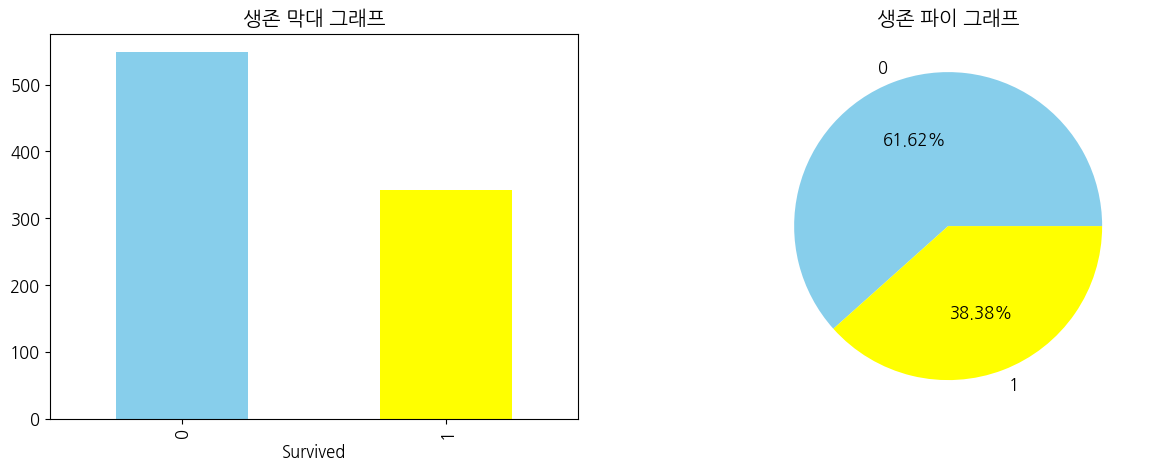

In [96]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].set_title("생존 막대 그래프")
freq_df['도수'].plot(kind='bar', ax=ax[0], color=['skyblue', 'yellow'])

ax[1].set_title("생존 파이 그래프")
ax[1].pie(freq_df.도수.values, colors=['skyblue', 'yellow'], autopct="%0.2f%%", labels=freq_df.도수.index)
plt.savefig('./vis.png')
plt.show()

In [99]:
#one-hot encoding 방식 / 체크형식
#pd.get_dummies(titanic, columns=['Sex'])
pd.get_dummies(titanic, columns=['Sex'], drop_first=True)
#label encoding 방식 / 일괄적으로 번호를 부여해 주는 형식 

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,True
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,False
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,False
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,False
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,S,True
887,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,S,False
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,S,False
889,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C,True


In [100]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 67.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [103]:
#파이썬에서 머신러닝은 scikit-learn으로 통일
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [104]:
label = LabelEncoder()

In [105]:
label.fit(titanic.Embarked)

LabelEncoder()

In [106]:
label.transform(titanic.Embarked)

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 3, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1,

In [111]:
one  = OneHotEncoder()
one.fit(pd.DataFrame(titanic.Embarked))
pd.DataFrame(one.transform(pd.DataFrame(titanic.Embarked)).toarray(),
            columns=one.get_feature_names_out())

,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
886,0.0,0.0,1.0,0.0
887,0.0,0.0,1.0,0.0
888,0.0,0.0,1.0,0.0
889,1.0,0.0,0.0,0.0


In [116]:
titanic.groupby(['Embarked', 'Survived'])[['Survived']].count()

/tmp/ipykernel_4671/2198201344.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(['Embarked', 'Survived'])[['Survived']].count()


Survived
Embarked Survived          
C        0               75
         1               93
Q        0               47
         1               30
S        0              427
         1              217

In [117]:
data = titanic.groupby(['Embarked', 'Survived'])[['Survived']].count()

/tmp/ipykernel_4671/1412102735.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = titanic.groupby(['Embarked', 'Survived'])[['Survived']].count()


In [118]:
data.unstack()

Survived     
Survived        0    1
Embarked              
C              75   93
Q              47   30
S             427  217

In [120]:
plt.style.use('ggplot')

<Axes: xlabel='Embarked'>

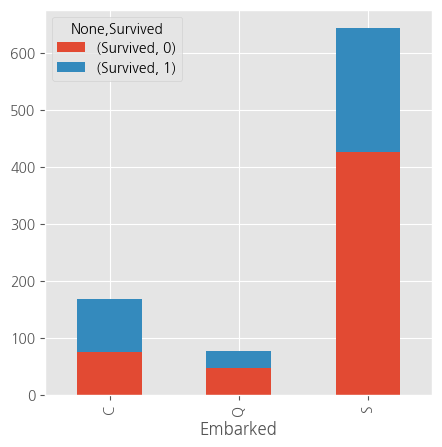

In [121]:
data.unstack().plot(kind='bar', stacked=True)

/tmp/ipykernel_4671/3616496501.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data1 = titanic.groupby(['Sex', 'Survived'])[['Survived']].count()


<Axes: xlabel='Sex'>

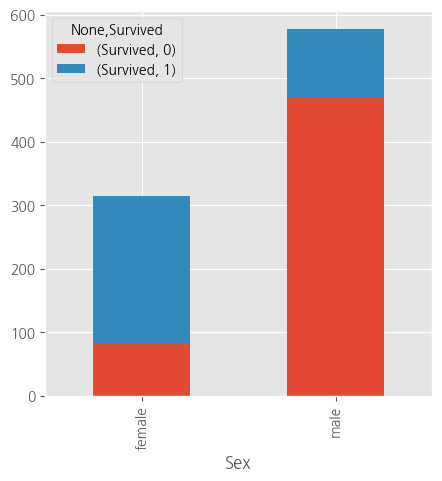

In [122]:
data1 = titanic.groupby(['Sex', 'Survived'])[['Survived']].count()
plt.style.use('ggplot')
data1.unstack().plot(kind='bar', stacked=True)

In [123]:
kbo

,index,선수명,등번호,생년월일,포지션,경력,입단 계약금,연봉,지명순위,입단년도,team,신장,체중,BMI,표준신장,표준체중
0,0.0,강동훈,No.034,2000년 11월 23일,투수(우투우타),천안남산초-청주중-청주고-중앙대,7000만원,3000만원,24 KIA 5라운드 46순위,,KIA 타이거즈,185,98,28.634039,0.455899,1.170041
1,1.0,강민제,No.038,2005년 02월 10일,내야수(우투우타),군산중앙초-군산중-군산상일고,4000만원,3000만원,24 KIA 9라운드 86순위,,KIA 타이거즈,181,82,25.029761,-0.346097,-0.611485
2,2.0,강이준,No.36,1998년 04월 07일,투수(우투우타),발산초-덕수중-구리인창고-KIA-상무,7000만원,3000만원,17 KIA 2차 4라운드 34순위,19KIA,KIA 타이거즈,190,86,23.822715,1.458394,-0.166103
3,3.0,고명성,No.,1999년 04월 16일,내야수(우투우타),군산남초-군산남중-군산상고-KT,7000만원,3100만원,18 KT 2차 4라운드 31순위,18KT,KIA 타이거즈,178,68,21.461937,-0.947594,-2.170319
4,4.0,고종욱,No.57,1989년 01월 11일,외야수(우투좌타),역삼초-대치중-경기고-한양대-히어로즈-상무-히어로즈-SK-SSG,8000만원,15000만원,11 넥센 3라운드 19순위,11넥센,KIA 타이거즈,184,83,24.515595,0.255400,-0.500139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,NaN,주승우,No.30,2000년 01월 30일,투수(우투우타),송추초(의정부리틀)-영동중-서울고-성균관대,18000만원,3200만원,22 키움 1차,22키움,키움 히어로즈,180,82,25.308642,-0.546596,-0.611485
1822,NaN,최주환,No.53,1988년 02월 28일,내야수(우투좌타),학강초-광주동성중-광주동성고-두산-상무-두산-SK-SSG,6000만원,65000만원,06 두산 2차 6라운드 46순위,06두산,키움 히어로즈,177,73,23.301095,-1.148092,-1.613593
1823,NaN,하영민,No.50,1995년 05월 07일,투수(우투우타),광주수창초-진흥중-진흥고-히어로즈,15000만원,8000만원,14 넥센 2차 1라운드 4순위,14넥센,키움 히어로즈,183,74,22.096808,0.054901,-1.502247
1824,NaN,헤이수스,No.54,1996년 12월 10일,투수(좌투좌타),베네수엘라 Juanita Hernandez(고),,600000달러,24 키움 자유선발,24키움,키움 히어로즈,192,104,28.211806,1.859391,1.838113


In [124]:
kbo.경력.isnull().sum()

np.int64(0)

In [125]:
kbo.경력.apply(lambda x : x == '').sum()

np.int64(0)

In [129]:
국내 = kbo[~kbo.연봉.str.endswith("달러")]

In [131]:
국내경력 = 국내[['선수명', 'team', '등번호', '경력']]

In [138]:
국내경력2 = pd.concat([국내경력, 국내경력['경력'].str.split("-", expand=True)], axis=1)

In [139]:
국내경력2

,선수명,team,등번호,경력,0,1,2,3,4,5,6,7,8,9
0,강동훈,KIA 타이거즈,No.034,천안남산초-청주중-청주고-중앙대,천안남산초,청주중,청주고,중앙대,None,None,None,None,None,None
1,강민제,KIA 타이거즈,No.038,군산중앙초-군산중-군산상일고,군산중앙초,군산중,군산상일고,None,None,None,None,None,None,None
2,강이준,KIA 타이거즈,No.36,발산초-덕수중-구리인창고-KIA-상무,발산초,덕수중,구리인창고,KIA,상무,None,None,None,None,None
3,고명성,KIA 타이거즈,No.,군산남초-군산남중-군산상고-KT,군산남초,군산남중,군산상고,KT,None,None,None,None,None,None
4,고종욱,KIA 타이거즈,No.57,역삼초-대치중-경기고-한양대-히어로즈-상무-히어로즈-SK-SSG,역삼초,대치중,경기고,한양대,히어로즈,상무,히어로즈,SK,SSG,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,주성원,키움 히어로즈,No.25,부산대연초(남구리틀)-부산신정중-개성고,부산대연초(남구리틀),부산신정중,개성고,None,None,None,None,None,None,None
1820,주승빈,키움 히어로즈,No.91,구운초(수원권선구리틀)-영동중-서울고,구운초(수원권선구리틀),영동중,서울고,None,None,None,None,None,None,None
1821,주승우,키움 히어로즈,No.30,송추초(의정부리틀)-영동중-서울고-성균관대,송추초(의정부리틀),영동중,서울고,성균관대,None,None,None,None,None,None
1822,최주환,키움 히어로즈,No.53,학강초-광주동성중-광주동성고-두산-상무-두산-SK-SSG,학강초,광주동성중,광주동성고,두산,상무,두산,SK,SSG,None,None


In [141]:
국내경력2.drop('경력', axis=1, inplace=True)

In [142]:
국내경력2

,선수명,team,등번호,0,1,2,3,4,5,6,7,8,9
0,강동훈,KIA 타이거즈,No.034,천안남산초,청주중,청주고,중앙대,None,None,None,None,None,None
1,강민제,KIA 타이거즈,No.038,군산중앙초,군산중,군산상일고,None,None,None,None,None,None,None
2,강이준,KIA 타이거즈,No.36,발산초,덕수중,구리인창고,KIA,상무,None,None,None,None,None
3,고명성,KIA 타이거즈,No.,군산남초,군산남중,군산상고,KT,None,None,None,None,None,None
4,고종욱,KIA 타이거즈,No.57,역삼초,대치중,경기고,한양대,히어로즈,상무,히어로즈,SK,SSG,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,주성원,키움 히어로즈,No.25,부산대연초(남구리틀),부산신정중,개성고,None,None,None,None,None,None,None
1820,주승빈,키움 히어로즈,No.91,구운초(수원권선구리틀),영동중,서울고,None,None,None,None,None,None,None
1821,주승우,키움 히어로즈,No.30,송추초(의정부리틀),영동중,서울고,성균관대,None,None,None,None,None,None
1822,최주환,키움 히어로즈,No.53,학강초,광주동성중,광주동성고,두산,상무,두산,SK,SSG,None,None


In [144]:
국내경력_melt = pd.melt(국내경력2, id_vars=['선수명', 'team', '등번호'])

In [145]:
국내경력_melt

,선수명,team,등번호,variable,value
0,강동훈,KIA 타이거즈,No.034,0,천안남산초
1,강민제,KIA 타이거즈,No.038,0,군산중앙초
2,강이준,KIA 타이거즈,No.36,0,발산초
3,고명성,KIA 타이거즈,No.,0,군산남초
4,고종욱,KIA 타이거즈,No.57,0,역삼초
...,...,...,...,...,...
17415,주성원,키움 히어로즈,No.25,9,None
17416,주승빈,키움 히어로즈,No.91,9,None
17417,주승우,키움 히어로즈,No.30,9,None
17418,최주환,키움 히어로즈,No.53,9,None


In [148]:
국내경력_melt.drop_duplicates(inplace=True)

In [151]:
국내경력_melt[국내경력_melt.선수명 == '강동훈']

,선수명,team,등번호,variable,value
0,강동훈,KIA 타이거즈,No.034,0,천안남산초
1742,강동훈,KIA 타이거즈,No.034,1,청주중
3484,강동훈,KIA 타이거즈,No.034,2,청주고
5226,강동훈,KIA 타이거즈,No.034,3,중앙대
6968,강동훈,KIA 타이거즈,No.034,4,None
8710,강동훈,KIA 타이거즈,No.034,5,None
10452,강동훈,KIA 타이거즈,No.034,6,None
12194,강동훈,KIA 타이거즈,No.034,7,None
13936,강동훈,KIA 타이거즈,No.034,8,None
15678,강동훈,KIA 타이거즈,No.034,9,None


In [150]:
국내경력_melt[국내경력_melt.선수명 == '강동훈'].isnull().sum()

선수명         0
team        0
등번호         0
variable    0
value       6
dtype: int64

In [153]:
국내경력_melt.dropna(inplace=True)

In [155]:
국내경력_melt[국내경력_melt.선수명 == '강동훈']

,선수명,team,등번호,variable,value
0,강동훈,KIA 타이거즈,No.034,0,천안남산초
1742,강동훈,KIA 타이거즈,No.034,1,청주중
3484,강동훈,KIA 타이거즈,No.034,2,청주고
5226,강동훈,KIA 타이거즈,No.034,3,중앙대


In [163]:
국내경력_melt

,선수명,team,등번호,value
0,강동훈,KIA 타이거즈,No.034,천안남산초
1,강민제,KIA 타이거즈,No.038,군산중앙초
2,강이준,KIA 타이거즈,No.36,발산초
3,고명성,KIA 타이거즈,No.,군산남초
4,고종욱,KIA 타이거즈,No.57,역삼초
...,...,...,...,...
14186,허도환,LG 트윈스,No.30,KT
14471,김상수,롯데 자이언츠,No.24,SSG
14613,장시환,한화 이글스,No.28,롯데
14788,이원석,키움 히어로즈,No.17,삼성


In [164]:
국내경력_melt = 국내경력_melt.rename(columns={'value' : '경력'})

In [165]:
국내경력_melt

,선수명,team,등번호,경력
0,강동훈,KIA 타이거즈,No.034,천안남산초
1,강민제,KIA 타이거즈,No.038,군산중앙초
2,강이준,KIA 타이거즈,No.36,발산초
3,고명성,KIA 타이거즈,No.,군산남초
4,고종욱,KIA 타이거즈,No.57,역삼초
...,...,...,...,...
14186,허도환,LG 트윈스,No.30,KT
14471,김상수,롯데 자이언츠,No.24,SSG
14613,장시환,한화 이글스,No.28,롯데
14788,이원석,키움 히어로즈,No.17,삼성


In [ ]:
국내경력_melt[['선수명', 'team', '등번호']]

In [167]:
pd.merge(국내경력_melt, kbo[['선수명', 'team', '등번호', '신장', '체중']], left_on = ['선수명', 'team', '등번호'], right_on=['선수명', 'team', '등번호'], how='left')

,선수명,team,등번호,경력,신장,체중
0,강동훈,KIA 타이거즈,No.034,천안남산초,185,98
1,강동훈,KIA 타이거즈,No.034,천안남산초,185,98
2,강민제,KIA 타이거즈,No.038,군산중앙초,181,82
3,강민제,KIA 타이거즈,No.038,군산중앙초,181,82
4,강이준,KIA 타이거즈,No.36,발산초,190,86
...,...,...,...,...,...,...
7167,장시환,한화 이글스,No.28,롯데,184,97
7168,이원석,키움 히어로즈,No.17,삼성,181,82
7169,이원석,키움 히어로즈,No.17,삼성,181,82
7170,박병호,삼성 라이온즈,No.59,KT,185,107
